In [1]:
# 0. 사용할 패키지 불러오기
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import random

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

look_back = 10

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기
signal_data = []
for i in range(365):
    random_5 = random.randint(1,5)
    signal_data.append(random_5)
signal_data=np.array(signal_data)
signal_data=signal_data[:,None]

In [3]:
# 데이터 전처리
scaler = MinMaxScaler(feature_range=(1, 5))
signal_data = scaler.fit_transform(signal_data)

In [4]:
# 데이터 분리
train = signal_data[0:220]
val = signal_data[220:290]
test = signal_data[290:]

In [5]:
# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

In [6]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [7]:
# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

In [8]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()


Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 4s 18ms/step - loss: 2.7469 - val_loss: 2.2174
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 2.2079 - val_loss: 2.2440
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 2.1039 - val_loss: 2.2852
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 2.1499 - val_loss: 2.2590
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 2.1840 - val_loss: 2.2239
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 2.1400 - val_loss: 2.2110
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.1183 - va

210/210 [==============================] - 2s 10ms/step - loss: 2.0153 - val_loss: 2.1761
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.0357 - val_loss: 2.1757
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.9912 - val_loss: 2.1717
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.1174 - val_loss: 2.1779
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.0214 - val_loss: 2.1907
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.0890 - val_loss: 2.1708
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.0770 - val_loss: 2.1713
Train on 210 samples, validate on 60 sam

Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 1.8626 - val_loss: 2.2212
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 1.8980 - val_loss: 2.2169
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 1.9365 - val_loss: 2.2326
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 11ms/step - loss: 1.8549 - val_loss: 2.3111
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.0151 - val_loss: 2.2335
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 2.0541 - val_loss: 2.2690
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.7848 - va

210/210 [==============================] - 2s 12ms/step - loss: 1.4750 - val_loss: 2.7217
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.3551 - val_loss: 2.5723
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.3467 - val_loss: 2.6410
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.4146 - val_loss: 2.6680
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.3676 - val_loss: 2.6012
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.3783 - val_loss: 2.6824
Train on 210 samples, validate on 60 samples
Epoch 1/1
210/210 [==============================] - 2s 10ms/step - loss: 1.3126 - val_loss: 2.6946
Train on 210 samples, validate on 60 sam

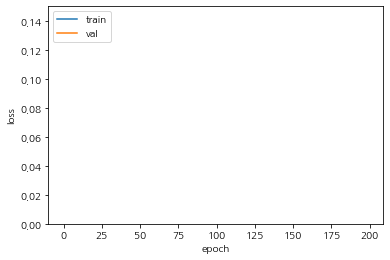

In [10]:
# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [11]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, verbose=1)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

ValueError: In a stateful network, you should only pass inputs with a number of samples that can be divided by the batch size. Found: 210 samples

In [ ]:
# 7. 모델 사용하기
look_ahead = 10
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()